La aproximación de la integral usando la regla de Simpson con n=6 es: 5.159318e-05 C


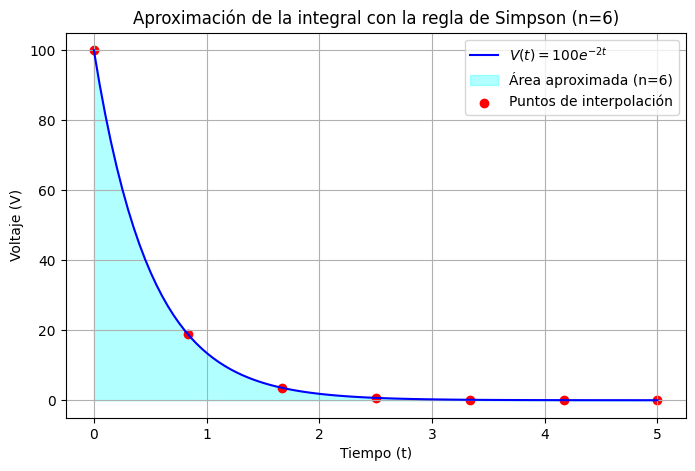

La aproximación de la integral usando la regla de Simpson con n=10 es: 5.024558e-05 C


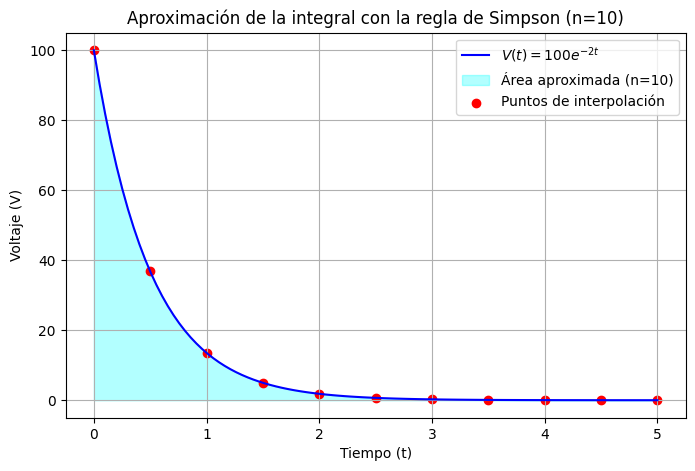

La aproximación de la integral usando la regla de Simpson con n=20 es: 5.001459e-05 C


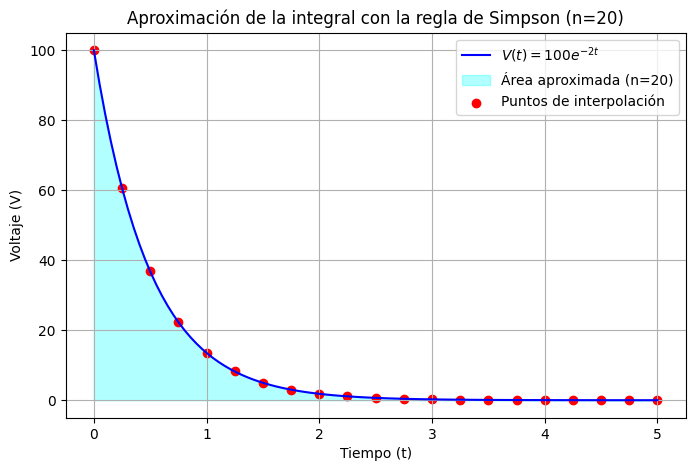

La aproximación de la integral usando la regla de Simpson con n=30 es: 5.000111e-05 C


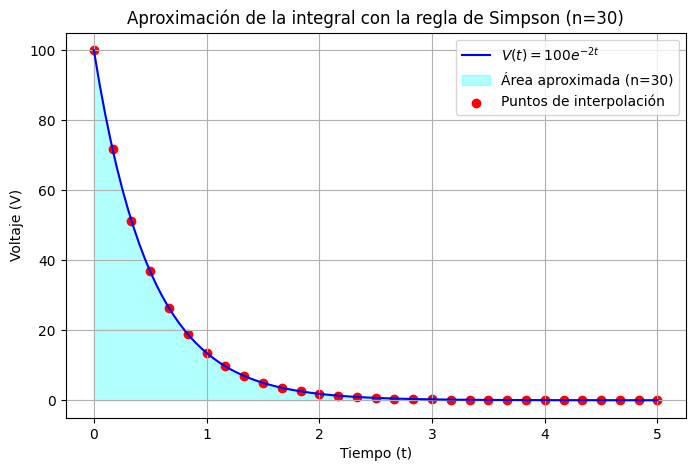

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simpson_rule(f, a, b, n):
    """Aproxima la integral de f(x) en [a, b] usando la regla de Simpson."""
    if n % 2 == 1:
        raise ValueError("El número de subintervalos (n) debe ser par.")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    fx = f(x)

    # Aplicamos la regla de Simpson
    integral = (h / 3) * (fx[0] + 2 * np.sum(fx[2:n:2]) + 4 * np.sum(fx[1:n:2]) + fx[n])
    return integral

# Definir la función V(t)
def funcion(t):
    return 100 * np.exp(-2 * t)

# Parámetros
a, b = 0, 5  # Intervalo [0, 5]
capacitancia = 1e-6  # Capacitancia en Faradios

# Bucle para calcular y graficar con diferentes valores de n
for n in [6, 10, 20, 30]:
    # Calcular la carga almacenada
    carga = capacitancia * simpson_rule(funcion, a, b, n)
    print(f"La aproximación de la integral usando la regla de Simpson con n={n} es: {carga:.6e} C")

    # Visualización de la función V(t) y el área aproximada
    x_vals = np.linspace(a, b, 100)
    y_vals = funcion(x_vals)

    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, y_vals, label=r"$V(t) = 100e^{-2t}$", color="blue")
    plt.fill_between(x_vals, y_vals, alpha=0.3, color="cyan", label=f"Área aproximada (n={n})")
    plt.scatter(np.linspace(a, b, n + 1), funcion(np.linspace(a, b, n + 1)), color="red", label="Puntos de interpolación")
    plt.xlabel("Tiempo (t)")
    plt.ylabel("Voltaje (V)")
    plt.title(f"Aproximación de la integral con la regla de Simpson (n={n})")
    plt.legend()
    plt.grid()

    # Guardar cada gráfica
    plt.savefig(f"simpson_n{n}.png")
    plt.show()
